## Scikit-learn

### Training a perceptron

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Class labels:',np.unique(y))

Class labels: [0 1 2]


#### Train-test split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)
print("Labels counts in y:",np.bincount(y))
print("Labels counts in y_test",np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_test [15 15 15]


#### Standardization 

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### Testing

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [6]:
y_pred = ppn.predict(X_test_std)
print("Misclassified samples",(y_test!=y_pred).sum())

Misclassified samples 3


In [7]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))


Accuracy: 0.93
Accuracy: 0.93


In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

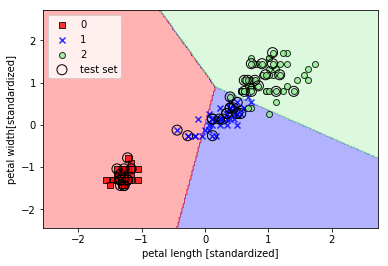

In [9]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X_combined_std,y_combined,classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc='upper left')
plt.show()

## Logistic Regression

### Logistic sigmoid function or simply the sigmoid function

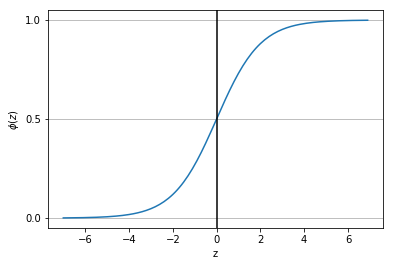

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0, color='k')
# plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

#### Cost function 

In [11]:
def cost_1(z):
    return -np.log(sigmoid(z))
def cost_0(z):
    return -np.log(1-sigmoid(z))

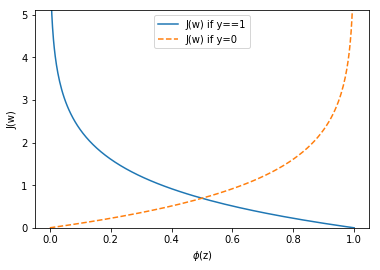

In [12]:
z= np.arange(-10,10,0.1)
phi_z=sigmoid(z)
c1= [cost_1(x) for x in z]
plt.plot(phi_z,c1,label='J(w) if y==1')
c0=[cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--',label='J(w) if y=0')
plt.ylim(0.0, 5.1)
# plt.xlim(0.0,1)
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.show()

In [13]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state= random_state
    def fit(self,X,y):
        rgen= np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size= 1+X.shape[1])
        self.cost_=[]
        for i in range(self.n_iter):
            net_input=self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:]+=self.eta* X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - (1-y).dot(np.log(1-output)))
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    def activation(self,z):
        return 1.0/(1.0+np.exp(-np.clip(z,-250,250)))
    def predict(self,X):
        return np.where(self.activation(self.net_input(X)) >= 0.5,1,0)


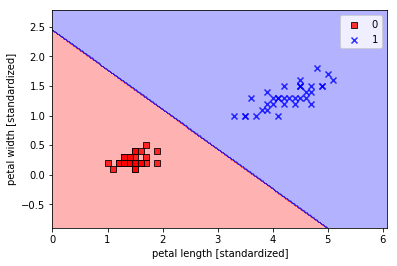

In [14]:
X_train_01_subset = X_train[(y_train== 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train== 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(n_iter=1000,random_state=1)
lrgd.fit(X_train_01_subset,y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,y=y_train_01_subset,classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='best')
plt.show()

### Logistic regression in scikit-learn

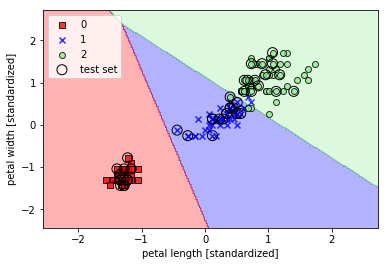

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100, random_state=1)
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [19]:
lr.predict_proba(X_test_std[:3,:])

array([[  3.20136878e-08,   1.46953648e-01,   8.53046320e-01],
       [  8.34428069e-01,   1.65571931e-01,   4.57896429e-12],
       [  8.49182775e-01,   1.50817225e-01,   4.65678779e-13]])

In [23]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0])

## Tackling overfitting via regularization 

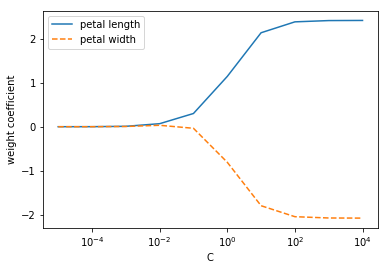

In [25]:
weights, params = [], []
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.**c,random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params,weights[:,0],label='petal length')
plt.plot(params,weights[:,1],linestyle='--',label='petal width')
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

### Slack variable 

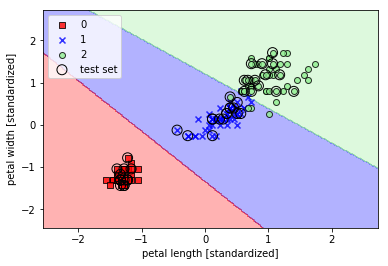

In [69]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=0.1,random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [27]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss = 'hinge')

### Kernel SVM 

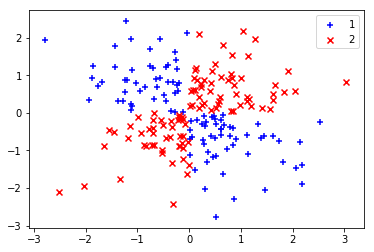

In [34]:
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0,X_xor[:,1]>0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='+',label='1')
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='r',marker='x',label='2')
plt.legend(loc='best')
plt.show()

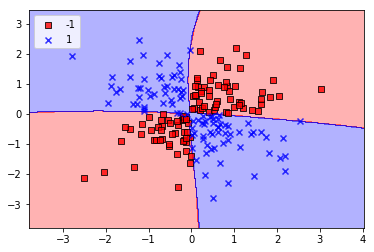

In [55]:
svm = SVC(kernel='rbf',random_state=1, gamma=0.1, C=10000000000.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.show()

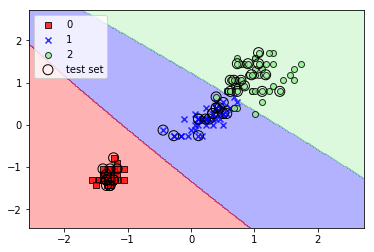

In [43]:
svm = SVC(kernel='rbf', random_state=1,gamma=0.08,C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.legend(loc='best')
plt.show()

## Decision Trees

### Impurity measures

In [61]:
def gini(p):
    return p*(1-p)+(1-p)*(1-(1-p))
def entropy(p):
    return p*np.log2(p) - (1 - p)*np.log2(1-p)
def error(p):
    return 1 - np.max([p,1-p])


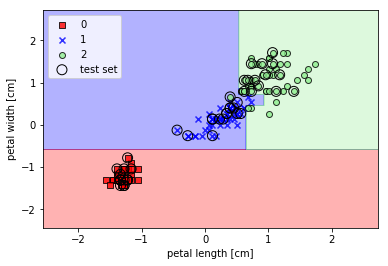

In [66]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=1)
tree.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=tree,test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

### Random Forests

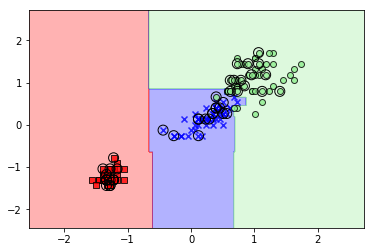

In [70]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                               n_estimators=25,
                               random_state=1,
                               n_jobs=2)
forest.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined,
                     classifier=forest,test_idx=range(105,150))
plt.show()

## K-nearest neighbours 

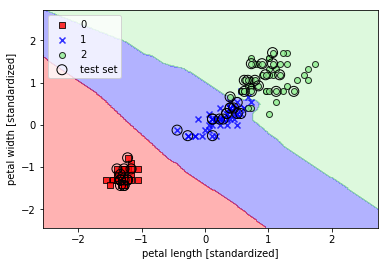

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()